# <center>Recurrent Neural Networks</center>
## <center>Inclass Project 3 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a RNN model to suggest autocompletion of half typed words. You may have seen this in many day today applications; typing an email, a text message etc. For example, suppose you type in the four letter "univ", the application may suggest you to autocomplete it by "university".

![Autocomplete](https://d33v4339jhl8k0.cloudfront.net/docs/assets/5c12e83004286304a71d5b72/images/66d0cb106eb51e63b8f9fbc6/file-gBQe016VYt.gif)

We will train a RNN to suggest possible autocompletes given $3$ - $4$ starting letters. That is if we input a string "univ" hopefully we expect to see an output like "university", "universal" etc.

For this we will use a text file (wordlist.txt) containing 10,000 common English words (you'll find the file on the moodle link). The list of words will be the "**vocabulary**" for our model.

We will use the Python **torch library** to implement our autocomplete model. 

***


Use the below cell to use any include any imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

## Section 1: Preparing the vocabulary

In [2]:
WORD_SIZE = 13

**Q1.** In the following cell provide code to load the text file (each word is in a newline), then extract the words (in lowercase) into a list.

For practical reasons of training the model we will only use words that are longer that $3$ letters and that have a maximum length of WORD_SIZE (this will be a constant we set at the beginning - you can change this and experiment with different WORD_SIZEs). As seen above it is set to $13$.

So out of the extracted list of words filter out those words that match our criteria on word length.

To train our model it is convenient to have words/strings of equal length. We will choose to convert every word to length of WORD_SIZE, by adding underscores to the end of the word if it is initially shorter than WORD_SIZE. For example, we will convert the word "university" (word length 10) into "university___" (wordlength 13). In your code include this conversion as well.

Store the processed WORD_SIZE lengthed strings in a list called vocab.

In [3]:
#TODO
def process_words(file_path):
    vocab = []

    # Open the text file and read each word (assuming each word is on a new line)
    with open(file_path, 'r') as f:
        words = f.readlines()

    # Process each word
    for word in words:
        word = word.strip().lower()  # Remove any surrounding whitespace and convert to lowercase
        if 3 < len(word) <= WORD_SIZE:  # Filter by word length
            # Add underscores to words shorter than WORD_SIZE
            word = word.ljust(WORD_SIZE, '_')
            vocab.append(word)

    return vocab

In [4]:
vocab= process_words("wordlist.txt")
print(vocab[:10])

['aaron________', 'abandoned____', 'aberdeen_____', 'abilities____', 'ability______', 'able_________', 'aboriginal___', 'abortion_____', 'about________', 'above________']


<font color='blue'>In the above explanation it was mentioned "for practical reasons of training the model we will only use words that are longer that $3$ letters and that have a certain maximum length". In your opinion what could be those practical? Will hit help to build a better model?</font>

**Answer** (to write answers edit this cell)

**Q2** To input words into the model, we will need to convert each letter/character into a number. as we have seen above, the only characters in our list vocab will be the underscore and lowercase english letters. so we will convert these $27$ characters into numbers as follows: underscore -> $0$, 'a' -> $1$, 'b' -> $2$, $\cdots$, 'z' -> $26$. In the following cell,

(i) Implement a method called char_to_num, that takes in a valid character and outputs its numerical assignment.

(ii) Implement a method called num_to_char, that takes in a valid number from $0$ to $26$ and outputs the corresponding character.

(iii) Implement a method called word_to_numlist, that takes in a word from our vocabulary and outputs a (torch) tensor of numbers that corresponds to each character in the word in that order. For example: the word "united_______" will be converted to tensor([21, 14,  9, 20,  5,  4,  0,  0,  0,  0,  0,  0,  0]). You are encouraged to use your char_to_num method for this.

(iv) Implement a method called numlist_to_word, that does the opposite of the above described word_to_numlist, given a tensor of numbers from $0$ to $26$, outputs the corresponding word. You are encouraged to use your  num_to_char method for this.

Note: As mentioned since we are using the torch library we will be using tensors instead of the usual python lists or numpy arrays. Tensors are the list equivalent in torch. Torch models only accept tensors as input and they output tensors.

In [5]:
char_map={}
char_map['_']=0
for i in range(1,27):
    letter=chr(i+96)
    char_map[letter] =i
    
num_map={v:k for k,v in char_map.items()}

print(char_map)  
print(num_map)

{'_': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '_', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [6]:

def char_to_num(char):
    #TODO
    num=char_map[char]
    return(num)

def num_to_char(num):
    #TODO
    char=num_map[num]
    return(char)

def word_to_numlist(word):
    #TODO
    numlist=[]
    for c in word:
       numlist.append(char_map[c]) 
    return(numlist)

def numlist_to_word(numlist):
    #TODO
    word=''
    for num in numlist:
        word+=num_to_char(num)
    return(word)

In [7]:
print(vocab[9])
word_to_numlist(vocab[9])

above________


[1, 2, 15, 22, 5, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
numlist_to_word([1, 2, 15, 22, 5, 0, 0, 0, 0, 0, 0, 0, 0])

'above________'

<font color='blue'>We convert letter into just numbers based on their aphabetical order, I claim that it is a very bad way to encode data such as letters to be fed into learning models, please write your explanation to or against my claim. If you are searching for reasons, the keyword 'categorical data' may be useful. Although the letters in our case are not treated as categorical data, the same reasons as for categorical data is applicable. Even if my claim is valid, at the end it won't matter due to something called "embedding layers" that we will use in our model. What is an embedding layer? What is it's purpose? Explain.</font>

**Answer** (to write answers edit this cell)

## Section 2: Implementing the Autocomplete model

We will implement a RNN model based on LSTM. The [video tutorial](https://www.youtube.com/watch?v=tL5puCeDr-o) will be useful. Our model will be only one hidden layer, but feel free to sophisticate with more layers after the project for your own experiments.

Our model will contain all the training and prediction methods as single package in a class (autocompleteModel) we will define and implement below.

In [9]:
LEARNING_RATE = 0.005

In [33]:
class autocompleteModel(nn.Module):

    def __init__(self, alphabet_size, embed_dim, hidden_size, num_layers):
        super().__init__()

        self.alphabet_size = alphabet_size
        self.embed_dim = embed_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(self.alphabet_size, self.embed_dim)
        self.lstm = nn.LSTM(self.embed_dim, self.hidden_size, self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, self.alphabet_size)

    def forward(self, character, hidden_state, cell_state):
        # Reshape character input to (1, 1) to represent batch_size = 1 and sequence_length = 1
        character = character.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1)
        embedded = self.embedding(character)  # Shape: (1, 1, embed_dim)
        lstm_out, (hidden_state, cell_state) = self.lstm(embedded, (hidden_state, cell_state))
        output = self.fc(lstm_out[:, -1, :])  # Shape: (1, alphabet_size)
        return output, hidden_state, cell_state

    def initial_state(self):
        h0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        c0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        return (h0, c0)

    def trainModel(self, vocab, epochs=5, batch_size=100):
        self.train()
        optimizer = optim.Adam(self.parameters(), lr=LEARNING_RATE)
        loss_log = []

        for e in range(epochs):
            np.random.shuffle(vocab)
            num_iter = len(vocab) // batch_size
            #print(f"Number of iterations per epoch: {num_iter}")
            print(f"Epoch: {e+1}/{epochs}")
            for i in range(num_iter):
                optimizer.zero_grad()
                vocab_batch = vocab[i * batch_size:(i + 1) * batch_size]
                total_loss = 0

                for word in vocab_batch:
                    hidden_state, cell_state = self.initial_state()

                    input_seq = torch.tensor([char_to_num(c) for c in word[:-1]], dtype=torch.long)
                    target_seq = torch.tensor([char_to_num(c) for c in word[1:]], dtype=torch.long)

                    # Process each character in the input sequence
                    for c in range(len(input_seq)):
                        output, hidden_state, cell_state = self(input_seq[c], hidden_state, cell_state)
                        loss = nn.CrossEntropyLoss()(output, target_seq[c].unsqueeze(0))  # Align shapes
                        total_loss += loss

                # Average loss over the batch
                avg_loss = total_loss / len(vocab_batch)
                avg_loss.backward()
                optimizer.step()

                # Update the loss_log
                loss_log.append(avg_loss.item())
            print(f"Loss: {avg_loss.item()}")

            

        # Plot the loss graph
        plt.plot(loss_log)
        plt.title('Loss over epochs')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
    
def autocomplete(self, sample):
    # Convert the model into evaluation mode
    self.eval()

    completed_list = []

    for literal in sample:
        # Initialize hidden and cell states
        hidden_state, cell_state = self.initial_state()

        # Convert input sample to a tensor of character indices
        input_seq = torch.tensor([char_to_num(c) for c in literal], dtype=torch.long)
        
        # Store the completed word, starting with the initial input
        word = literal
        
        # Predict the remaining characters
        for _ in range(WORD_SIZE - len(literal)):
            # Feed the last character in the sequence to the model
            output, hidden_state, cell_state = self(input_seq[-1].unsqueeze(0), hidden_state, cell_state)

            # Apply softmax to the output to get a probability distribution
            output = torch.softmax(output, dim=1)

            # Sample from the output distribution to get the next character index
            next_char_idx = torch.multinomial(output, 1).item()

            # Convert the character index back to a character
            next_char = num_to_char[next_char_idx]

            # Append the predicted character to the word
            word += next_char

            # Update the input sequence with the new character index
            input_seq = torch.cat((input_seq, torch.tensor([next_char_idx], dtype=torch.long)))
        
        # Add the completed word to the list
        completed_list.append(word)

    return completed_list


## Section 3: Using and evaluating the model

(i) Feel free to initialize a autocompleteModel using different embedding dimensions and hidden layer sizes. Use different learning rates, epochs, batch sizes. Train the best model you can. Show the loss curves in you answers.

**Answer** (to write answers edit this cell)

Epoch: 1/10
Loss: 18.941146850585938
Epoch: 2/10
Loss: 16.384737014770508
Epoch: 3/10
Loss: 15.251800537109375
Epoch: 4/10
Loss: 15.567130088806152
Epoch: 5/10
Loss: 14.77159309387207
Epoch: 6/10
Loss: 13.823975563049316
Epoch: 7/10
Loss: 14.450021743774414
Epoch: 8/10
Loss: 13.347177505493164
Epoch: 9/10
Loss: 14.458364486694336
Epoch: 10/10
Loss: 12.874858856201172


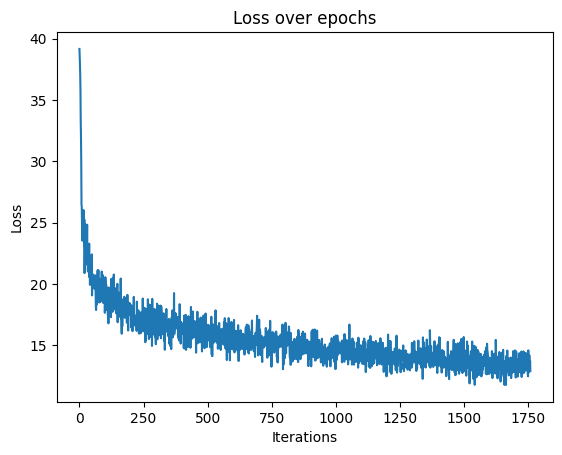

In [36]:
param={'embed_dim': 10, 'hidden_size': 30, 'num_layers': 3, 'learning_rate': 0.001, 'epochs': 10, 'batch_size': 50}
vocab = process_words("wordlist.txt") #["univ", "math", "neur", "engin"]

model = autocompleteModel(alphabet_size=27, embed_dim=param['embed_dim'], hidden_size=param['hidden_size'], num_layers=param['num_layers'])
loss_log = model.trainModel(vocab, epochs=param['epochs'], batch_size=param['batch_size'])


In [37]:
sample= ["univ", "math", "neur", "engin"]
model.autocomplete(sample)

['univexpont___', 'matherat_____', 'neurhougly___', 'enginoce_____']

In [39]:
params = [
    {
        'embed_dim': 20,        # Medium embedding size for good character representations
        'hidden_size': 50,      # Moderately large hidden size for more complex patterns
        'num_layers': 2,        # Two LSTM layers for better learning capacity
        'learning_rate': 0.0005, # Small learning rate for stable learning
        'epochs': 5,
        'batch_size': 64        # Larger batch size for faster training
    },
    {
        'embed_dim': 30,        # Larger embedding size for more detailed representations
        'hidden_size': 100,     # Larger hidden size to capture complex sequences
        'num_layers': 3,        # Three LSTM layers for more depth
        'learning_rate': 0.0003, # Lower learning rate for careful optimization
        'epochs': 5,
        'batch_size': 32        # Smaller batch size for better generalization
    },
    {
        'embed_dim': 10,        # Smaller embedding size for faster training
        'hidden_size': 30,      # Small hidden size for quick learning
        'num_layers': 1,        # Single LSTM layer for simplicity
        'learning_rate': 0.001, # Higher learning rate for faster convergence
        'epochs': 5,
        'batch_size': 128       # Large batch size for quick iterations
    },
    {
        'embed_dim': 15,        # Balanced embedding size for moderate learning capacity
        'hidden_size': 40,      # Mid-range hidden size for a balance of speed and performance
        'num_layers': 2,        # Two layers for capturing temporal dependencies
        'learning_rate': 0.0007, # Slightly higher learning rate for faster training
        'epochs': 5,
        'batch_size': 50        # Medium batch size for balanced training speed and performance
    },
    {
        'embed_dim': 5,         # Small embedding size for very simple models
        'hidden_size': 20,      # Smaller hidden size for simpler patterns
        'num_layers': 1,        # Single layer for small datasets
        'learning_rate': 0.0015, # Higher learning rate for quick convergence
        'epochs': 5,
        'batch_size': 100       # Large batch size for faster processing
    }
]


Epoch: 1/5
Loss: 16.7148380279541
Epoch: 2/5
Loss: 15.998915672302246
Epoch: 3/5
Loss: 15.169489860534668
Epoch: 4/5
Loss: 13.827964782714844
Epoch: 5/5
Loss: 14.133537292480469


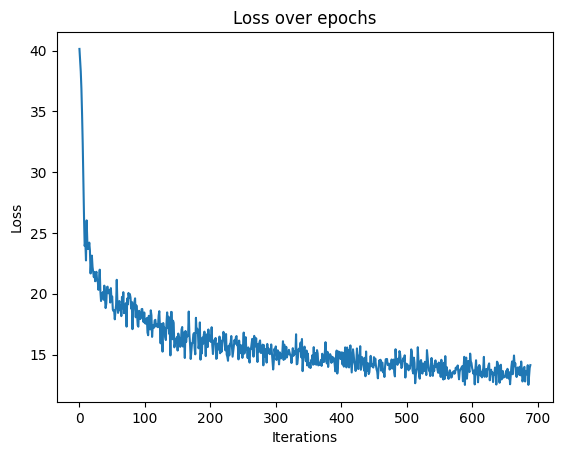

Epoch: 1/5
Loss: 14.821723937988281
Epoch: 2/5
Loss: 14.774230003356934
Epoch: 3/5
Loss: 14.55547046661377
Epoch: 4/5
Loss: 13.555006980895996
Epoch: 5/5
Loss: 13.323216438293457


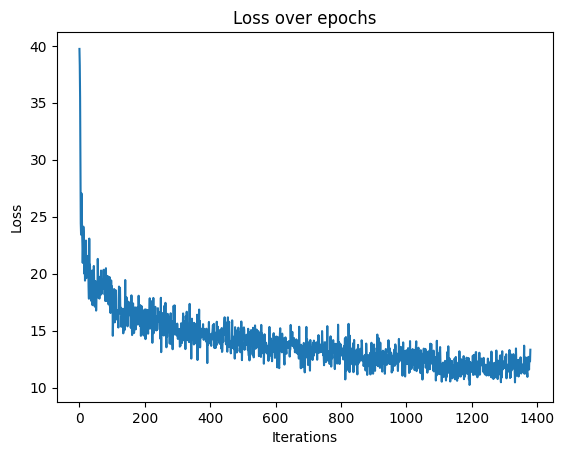

Epoch: 1/5
Loss: 19.498550415039062
Epoch: 2/5
Loss: 18.00497817993164
Epoch: 3/5
Loss: 16.868228912353516
Epoch: 4/5
Loss: 16.369892120361328
Epoch: 5/5
Loss: 15.619181632995605


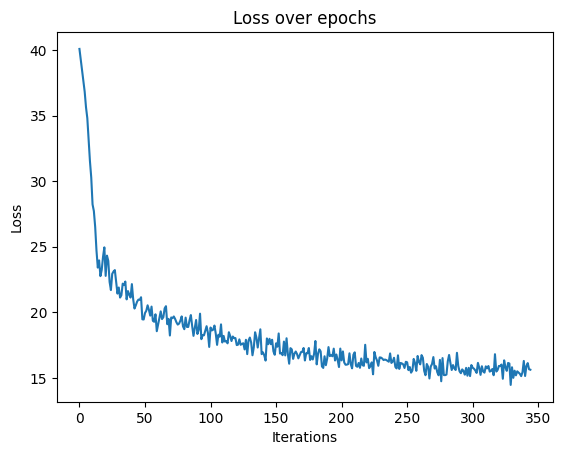

Epoch: 1/5
Loss: 16.8101749420166
Epoch: 2/5
Loss: 13.959585189819336
Epoch: 3/5
Loss: 13.998543739318848
Epoch: 4/5
Loss: 13.780254364013672
Epoch: 5/5
Loss: 13.594810485839844


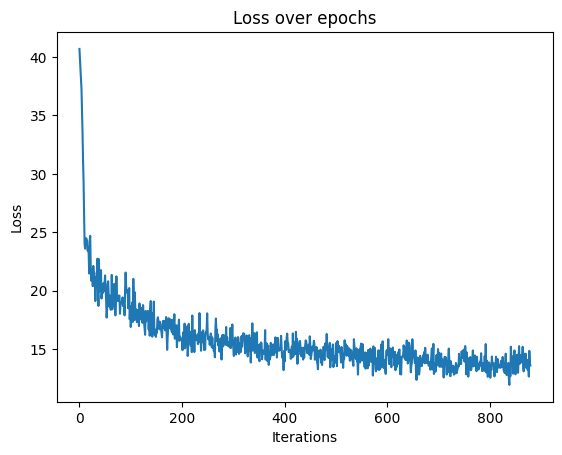

Epoch: 1/5
Loss: 19.519859313964844
Epoch: 2/5
Loss: 19.255294799804688
Epoch: 3/5
Loss: 17.057008743286133
Epoch: 4/5
Loss: 16.637203216552734
Epoch: 5/5
Loss: 15.731287956237793


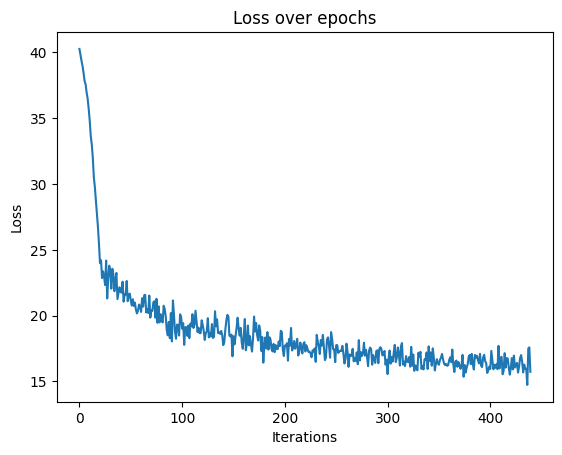

In [40]:
model_list=[]
for param in params:
    print(f"parameters for model ={param}")
    model = autocompleteModel(alphabet_size=27, embed_dim=param['embed_dim'], hidden_size=param['hidden_size'], num_layers=param['num_layers'])
    loss_log = model.trainModel(vocab, epochs=param['epochs'], batch_size=param['batch_size'])
    model_list.append(model)

    

(ii) Evaluate it on different samples of partially filled in words. Eg: ["univ", "math", "neur", "engin"] etc. Please show outputs for different samples.

<font color='blue'>Comment on the results. Is it successful? Do you see familiar substrings in the generated tesxt such as "tion", "ing", "able" etc. What are your suggestions to improve the model?</font>

In [45]:
sample= ["univ", "math", "neur", "engin","creat","backgr","believ","benefici","decrea","essenti","festi","hospit","issu","janua","knitt","lanca","magnifi","neighbor"]
i=1
for model in model_list:
    print(f"model {i}")
    print(model.autocomplete(sample))
    print("\n")
    i=i+1

model 1
['univirios____', 'mathuird_____', 'neuratored___', 'enginensures_', 'creathincer__', 'backgrealiste', 'believireplou', 'beneficinsuet', 'decrearatorsh', 'essentipplose', 'festincored__', 'hospitrabargi', 'issuzatemanic', 'januattrrew__', 'knittilnmentl', 'lancamficting', 'magnifintrows', 'neighboriclit']


model 2
['univiculated_', 'mathelwiles__', 'neureners____', 'enginewso____', 'creathoat____', 'backgreadly__', 'believecialit', 'beneficindian', 'decrealdry___', 'essentipligal', 'festinjing___', 'hospitowverwo', 'issundagent__', 'januakorices_', 'knittraints__', 'lancapporter_', 'magnifintorde', 'neighboremain']


model 3
['univigayach__', 'matheedchonna', 'neurabken____', 'enginiture___', 'createlibbed_', 'backgriols___', 'believeyllal_', 'beneficiensen', 'decrease_____', 'essentiondion', 'festibetsolg_', 'hospitkevaine', 'issuthrous___', 'januakghed___', 'knittelentin_', 'lancangkery__', 'magnifinhed__', 'neighboriald_']


model 4
['univilufer___', 'mathown______', 'neuru